In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from matplotlib import rc
import matplotlib as mpl
import scipy.optimize as opt
rc('text', usetex=True)
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "STIX"
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams["xtick.color"] ='black'
mpl.rcParams["legend.borderpad"] = 0.1
mpl.rcParams["legend.handletextpad"] = 0.1
mpl.rcParams["font.size"] = 8

Helper function for plotting.

In [3]:
def QFI_approx(N):
    """Analytical approximation for the Quantum Fisher Information in the exteme
    time crystal limit."""
    return np.sqrt(8*(N*(N-1)*(N+2)*(N+3)/240*(2/9)) + 2/3*N*(N+2))

def fit_func(x, A, B):
    """"Power-law fit function."""
    return A*x**(-B)

Plot Fig. S1

FileNotFoundError: [Errno 2] No such file or directory: 'QFI_figS1a.csv'

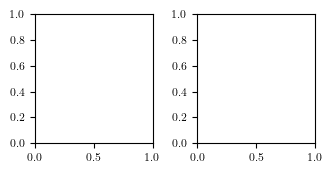

In [4]:
fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(3.54331*0.95,3.54331*0.5),
                                layout = 'tight')
colors = ['#1b9e77','#d95f02','#7570b3']
index  = 0

#------------------------------------------------------------------------------#
# Fig. S1(a)

df = pd.read_csv('QFI_figS1a.csv')
df = pd.DataFrame(df)
for N in [20,40,80]:
    ax1.plot(df['ratio'].loc[df['N']==N], 
             np.sqrt(abs(df['QFI'].loc[df['N']==N]))/N, color=colors[index], 
             label=r'$N=$ '+str(N))
    ax1.plot([0,5], np.array([1,1])*QFI_approx(N)/N, color=colors[index], 
             linestyle='dashed', linewidth=1)
    index += 1
ax1.set_xlabel(r'$\omega / \omega_c$')
ax1.set_ylabel(r'$f_\varphi^{1/2}/N$')
ax1.set_xticks([0, 1, 2, 3, 4, 5])
ax1.set_xlim(0, 4.2)
ax1.set_ylim(0, 8)
ax1.vlines(1, 0, 10, linestyles='dashed', linewidth=1, colors='black', alpha=0.7)
ax1.axvspan(0, 1, alpha=0.10, color='red', hatch='\\\\')
ax1.axvspan(1, 5, alpha=0.05, color='blue', hatch='//')
ax1.tick_params(axis='both', length=2) 
ax1.legend(loc='center right', handlelength = 0.5, framealpha=0.8, ncol=1, 
           labelspacing=0.2, columnspacing=0.5, bbox_to_anchor=(1.0, 0.65))
ax1.text(0.98,0.98,'(a)', transform=ax1.transAxes, verticalalignment='top', 
         horizontalalignment='right')
ax1.text(0.125,0.45, 'stationary\nregime', transform=ax1.transAxes, 
         verticalalignment='bottom', horizontalalignment='center', rotation=90)
ax1.text(0.6, 0.025, 'time crystal\nregime', transform=ax1.transAxes, 
         verticalalignment='bottom', horizontalalignment='center')
ax1.yaxis.set_label_coords(-0.125,0.5)
ax1.text(0.0,1., r'$\times \kappa^{1/2}$', transform=ax1.transAxes,
         verticalalignment='bottom', horizontalalignment='left')

#------------------------------------------------------------------------------#
# Fig. S1(b)

colors = ['b', 'g', 'k']
marker = ['^', 'x', 'o']
index  = 0
ys = []
Ns = np.arange(10,105,10)
df = pd.read_csv('QFI_figS1b.csv')
df = pd.DataFrame(df)
for ratio in [4, 1, 0.5]:
    QFI = np.array([])
    df1 = df.loc[df['ratio']==ratio]
    for N in Ns:
        QFI = np.append(QFI, df['QFI'].loc[df['N']==N])
    ax2.scatter(np.arange(10,105,10), np.sqrt(QFI)/np.arange(10,105,10), 
                color = colors[index], marker=marker[index], 
                label = r'$\omega / \omega_c =$ '+str(ratio), s = 10)
    ys.append(QFI)
    ax1.scatter(ratio, 0.25, color = colors[index], marker=marker[index], 
                s = 10)
    index += 1

ax2.plot(np.linspace(9,110,100), QFI_approx(np.linspace(9,110,100))/np.linspace(9,110,100), 
         linestyle='dashed', color='red', linewidth=1)
popt05 , pcov05 = opt.curve_fit(fit_func, Ns, ys[0])
popt1 , pcov1 = opt.curve_fit(fit_func, Ns, ys[1])
popt4 , pcov4 = opt.curve_fit(fit_func, Ns, ys[2])
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlim(9,110)
ax2.set_ylim(0.4,20)
ax2.set_xticks([10,20,50,100])
ax2.set_xticklabels(['10','20','50','100'])
ax2.set_yticks([0.5, 1, 2, 4, 8, 16])
ax2.set_yticklabels(['0.5', '1', '2', '4', '8', '16'])
ax2.set_xlabel(r'$N$')
ax2.tick_params(axis='both', length=2) 
ax2.tick_params(axis='both', which='minor', length=1.5) 
ax2.legend(loc = 'best', handletextpad = 0.25, handlelength = 1.1,
            labelspacing=0.2, columnspacing=0.5)
ax2.text(0.98,0.98,'(b)', transform=ax2.transAxes, verticalalignment='top', 
         horizontalalignment='right')
ax2.text(0.225,0.335, r'$f_{\varphi,\infty}^{1/2}/N$', color='red', rotation=20, transform=ax2.transAxes, 
         verticalalignment='bottom', horizontalalignment='center')
ax2.text(0.9, 0.6, 'I', color='b', transform=ax2.transAxes)
ax2.text(0.9, 0.35, 'II', color='g', transform=ax2.transAxes)
print(popt05, popt1, popt4)
print(np.sqrt(np.diag(pcov05)),
      np.sqrt(np.diag(pcov1)),
      np.sqrt(np.diag(pcov4)))
ax2.text(0.0,1., r'$\times \kappa^{1/2}$', transform=ax2.transAxes,
         verticalalignment='bottom', horizontalalignment='left')

plt.show()

fig.savefig('qfi_deformed_ME.pdf', dpi = 1000)